# Severe Weather Capstone - Pre-processing

Greg Welliver   

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as plticker
import seaborn as sns
sns.set()
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
import warnings
from scipy import stats
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
%matplotlib inline


import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from scipy import stats

from sklearn import linear_model, preprocessing, tree, svm, datasets, metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, mean_squared_error, r2_score, f1_score, log_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import xgboost
from xgboost import XGBClassifier
import warnings
from subprocess import call
from IPython.display import Image
from datetime import datetime, timedelta, date
import os
import plotly.graph_objects as go
import itertools
from io import StringIO  
import pydotplus

# Seaborn settings
sns.set_context('notebook')
#sns.set_style("whitegrid")
#sns.set_style("white")
style_set = sns.set_style('whitegrid')
pd.options.display.float_format = '{:,}'.format
color_choice1 = 'plum'
color_choice2 = 'lightblue'
color_choice3 = 'lightgreen'
#ax.yaxis.set_major_formatter('{x:,.0f}')
#sns.set_context('notebook', font_scale = 4)


%matplotlib inline
import pandas as pd
#from mpl_toolkits.basemap import Basemap


import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx

from sklearn.feature_extraction.text import CountVectorizer


## Load the data



In [2]:
# load data
df = pd.read_parquet("../Data/all_storm_data11.pqt")
#df = pd.read_csv("../Data/all_storm_data4.csv")

In [3]:
df.head(40).T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
BEGIN_YEARMONTH,202202,202202,202202,202202,202202,202202,202202,202202,202202,202202,...,202201,202208,202208,202208,202208,202208,202208,202208,202208,202208
BEGIN_TIME,2118,800,200,1609,0,500,100,100,200,400,...,1200,1811,1839,1839,1225,1220,1218,1224,1224,1230
STATE,NEVADA,NEVADA,NEVADA,ATLANTIC SOUTH,AMERICAN SAMOA,AMERICAN SAMOA,KANSAS,KANSAS,MASSACHUSETTS,MASSACHUSETTS,...,OHIO,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS
YEAR,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,...,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022
MONTH_NAME,February,February,February,February,February,February,February,February,February,February,...,January,August,August,August,August,August,August,August,August,August
EVENT_TYPE,High Wind,Heavy Snow,Heavy Snow,Waterspout,Heavy Rain,Heavy Rain,Winter Storm,Winter Storm,Heavy Snow,Heavy Snow,...,Winter Weather,Hail,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind
BEGIN_DATE_TIME,2022-02-20 21:18:00,2022-02-21 08:00:00,2022-02-22 02:00:00,2022-02-18 16:09:00,2022-02-02 00:00:00,2022-02-12 05:00:00,2022-02-01 01:00:00,2022-02-01 01:00:00,2022-02-13 02:00:00,2022-02-13 04:00:00,...,2022-01-16 12:00:00,2022-08-29 18:11:00,2022-08-29 18:39:00,2022-08-29 18:39:00,2022-08-29 12:25:00,2022-08-29 12:20:00,2022-08-29 12:18:00,2022-08-29 12:24:00,2022-08-29 12:24:00,2022-08-29 12:30:00
INJURIES_DIRECT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
INJURIES_INDIRECT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DEATHS_DIRECT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# remove columns that won't have any predictive value
df = df.drop(['ST_CT_FIPS', 'EVENT_NARRATIVE', 'EPISODE_NARRATIVE', 'BEGIN_LON', 'BEGIN_LAT', 'BEGIN_DATE_TIME', 'MONTH_NAME', 'YEAR', 'BEGIN_YEARMONTH', 'MAGNITUDE_TYPE'], axis=1)

In [5]:
df.head(40).T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
BEGIN_TIME,2118,800,200,1609,0,500,100,100,200,400,...,1200,1811,1839,1839,1225,1220,1218,1224,1224,1230
STATE,NEVADA,NEVADA,NEVADA,ATLANTIC SOUTH,AMERICAN SAMOA,AMERICAN SAMOA,KANSAS,KANSAS,MASSACHUSETTS,MASSACHUSETTS,...,OHIO,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS,ILLINOIS
EVENT_TYPE,High Wind,Heavy Snow,Heavy Snow,Waterspout,Heavy Rain,Heavy Rain,Winter Storm,Winter Storm,Heavy Snow,Heavy Snow,...,Winter Weather,Hail,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind,Thunderstorm Wind
INJURIES_DIRECT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
INJURIES_INDIRECT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DEATHS_DIRECT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DEATHS_INDIRECT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DAMAGE_PROPERTY,0.0,0.0,0.0,0.0,"50,000.0",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MAGNITUDE,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,55.0,55.0,64.0,60.0,50.0,60.0,55.0,60.0
FLOOD_CAUSE,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


#### what about:
MAGNITUDE_TYPE


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555647 entries, 0 to 1555646
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   BEGIN_TIME         1555647 non-null  int64  
 1   STATE              1555647 non-null  object 
 2   EVENT_TYPE         1555647 non-null  object 
 3   INJURIES_DIRECT    1555647 non-null  int64  
 4   INJURIES_INDIRECT  1555647 non-null  int64  
 5   DEATHS_DIRECT      1555647 non-null  int64  
 6   DEATHS_INDIRECT    1555647 non-null  int64  
 7   DAMAGE_PROPERTY    1555647 non-null  float64
 8   MAGNITUDE          1555647 non-null  float64
 9   FLOOD_CAUSE        116296 non-null   object 
 10  TOR_F_SCALE        36040 non-null    object 
 11  TOR_LENGTH         1555647 non-null  float64
 12  TOR_WIDTH          1555647 non-null  float64
 13  DURATION           1555647 non-null  float64
 14  STORM_AREA         916584 non-null   float64
 15  PopDensity         1035753 non-n

In [7]:
#df.MAGNITUDE_TYPE.value_counts()

In [8]:
#df.TOR_F_SCALE.value_counts()

## Create dummy variables for categorical data types

In [9]:
# isolate categorical variables
categorical_features = df.select_dtypes(include=['object'])


In [10]:
df = pd.concat([df.drop(categorical_features, axis=1), pd.get_dummies(categorical_features)], axis=1)

In [11]:
df.head().T

,0,1,2,3,4
BEGIN_TIME,"2,118.0",800.0,200.0,"1,609.0",0.0
INJURIES_DIRECT,0.0,0.0,0.0,0.0,0.0
INJURIES_INDIRECT,0.0,0.0,0.0,0.0,0.0
DEATHS_DIRECT,0.0,0.0,0.0,0.0,0.0
DEATHS_INDIRECT,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
TOR_F_SCALE_F0,0.0,0.0,0.0,0.0,0.0
TOR_F_SCALE_F1,0.0,0.0,0.0,0.0,0.0
TOR_F_SCALE_F2,0.0,0.0,0.0,0.0,0.0
TOR_F_SCALE_F3,0.0,0.0,0.0,0.0,0.0


### Split data into training and testing subsets

In [12]:
# Create the X and y matrices from the dataframe
X = df.drop(columns = ['DAMAGE_PROPERTY'])
y = df['DAMAGE_PROPERTY']

In [13]:
X

,BEGIN_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,DURATION,STORM_AREA,...,TOR_F_SCALE_EF2,TOR_F_SCALE_EF3,TOR_F_SCALE_EF4,TOR_F_SCALE_EF5,TOR_F_SCALE_EFU,TOR_F_SCALE_F0,TOR_F_SCALE_F1,TOR_F_SCALE_F2,TOR_F_SCALE_F3,TOR_F_SCALE_F4
0,2118,0,0,0,0,36.0,0.0,0.0,60.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,800,0,0,0,0,0.0,0.0,0.0,"1,560.0",NaN,...,0,0,0,0,0,0,0,0,0,0
2,200,0,0,0,0,0.0,0.0,0.0,420.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1609,0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0.0,0.0,0.0,"1,440.0",0.006299999999999528,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555642,1200,0,0,0,0,0.0,0.0,0.0,240.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1555643,2150,0,0,0,0,0.0,0.0,0.0,310.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1555644,700,0,0,0,0,0.0,0.0,0.0,900.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1555645,700,0,0,0,0,0.0,0.0,0.0,900.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# from sklearn.model_selection import train_test_split; reserve 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)

In [15]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

## Scaling and Transforming Numeric Features

In [16]:
# Create subset of only the numeric columns
numeric_df = df.select_dtypes(include=['int', 'float'])
numeric_df = numeric_df.drop(columns = ['DAMAGE_PROPERTY'])

In [17]:
numeric_column_names = list(numeric_df.columns)

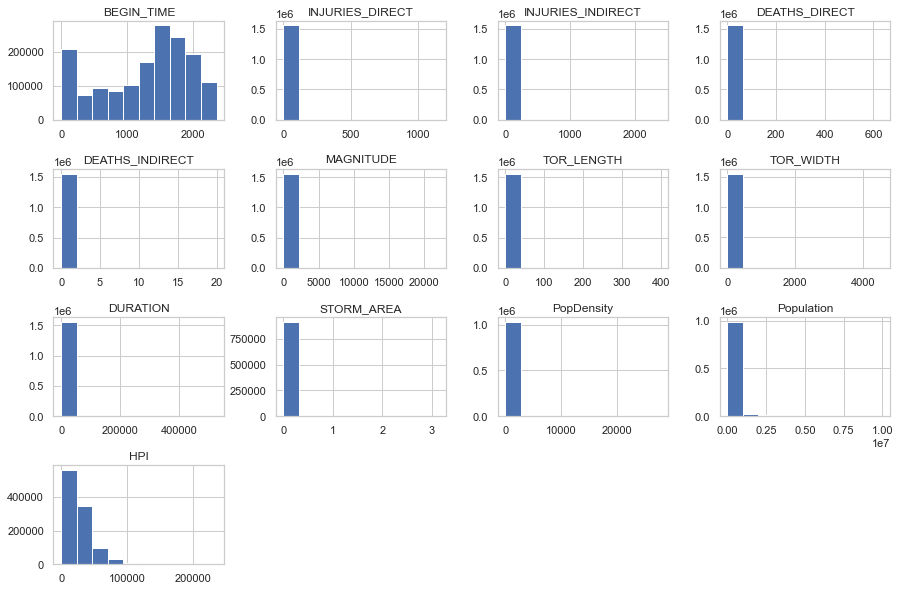

In [18]:
# let's look at the distribution of numeric variables
numeric_df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

In [19]:
# isolate numeric features of X_train and X_test
numeric_df_X_train = X_train.select_dtypes(include=['int', 'float'])
numeric_df_X_test = X_test.select_dtypes(include=['int', 'float'])

In [20]:
numeric_df_X_train

,BEGIN_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,DURATION,STORM_AREA,PopDensity,Population,HPI
0,1545,0,0,0,0,0.0,0.21,75.0,1.0,0.0016000000000033765,9.864005992,"13,091.0","21,007.0"
1,1120,0,0,0,0,1.75,0.0,0.0,0.0,0.0,5.335433147,"34,680.0","24,797.0"
2,1605,0,0,0,0,36.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,1340,0,0,0,0,1.0,0.0,0.0,10.0,0.000499999999995282,43.00662407,"104,688.0","21,583.0"
4,1537,0,0,0,0,0.0,4.0,110.0,5.0,0.016659999999994568,10.89445191,"15,902.0","15,506.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244512,1905,0,0,0,0,0.75,0.0,0.0,5.0,0.033329999999999416,55.12519437,"36,440.0","16,774.0"
1244513,548,5,1,0,0,0.0,8.22,581.0,6.0,0.02729999999999677,NaN,NaN,NaN
1244514,1531,0,0,0,0,50.0,0.0,0.0,1.0,0.0,229.2513381,"674,355.0","58,382.0"
1244515,1733,0,0,0,0,1.75,0.0,0.0,0.0,0.0,11.61542289,"16,873.0","1,637.0"


### Let's first try scaling with MinMax

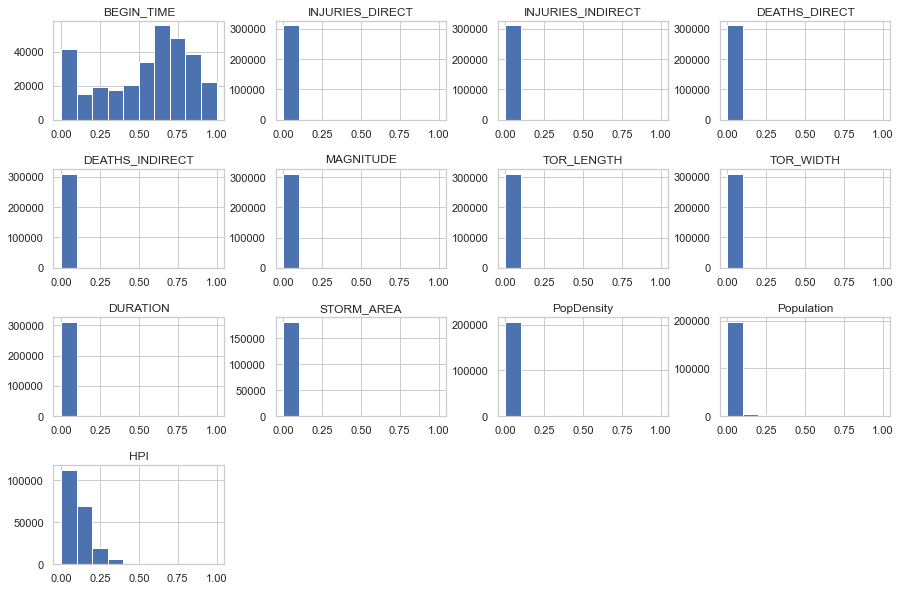

In [21]:
# scale X_train and X_test
# this should make all values between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# create model, fit, and transform
MM_scaler = MinMaxScaler()
numeric_df_mm_X_train = MM_scaler.fit_transform(numeric_df_X_train)
numeric_df_mm_X_test = MM_scaler.fit_transform(numeric_df_X_test)

# convert back to dataframe for plotting
numeric_df_mm_X_train = pd.DataFrame(numeric_df_mm_X_train)
numeric_df_mm_X_train.columns = numeric_column_names
numeric_df_mm_X_test = pd.DataFrame(numeric_df_mm_X_test)
numeric_df_mm_X_test.columns = numeric_column_names

#numeric_df_mm_X_train
numeric_df_mm_X_test.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

### Now let's try Standardization

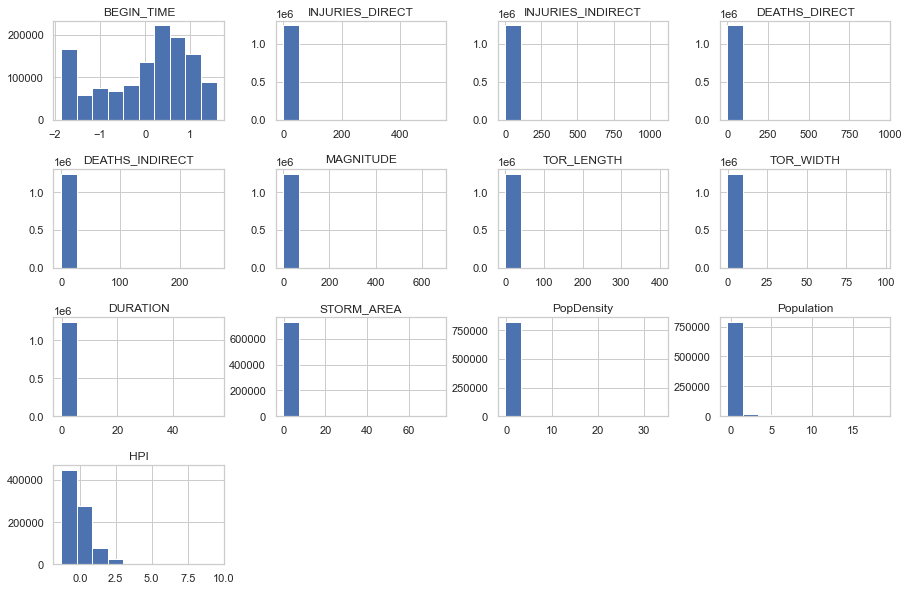

In [22]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# create model, fit, and transform
SS_scaler = StandardScaler()
numeric_df_ss_X_train = SS_scaler.fit_transform(numeric_df_X_train)
numeric_df_ss_X_test = SS_scaler.fit_transform(numeric_df_X_test)

# convert back to dataframe for plotting
numeric_df_ss_X_train = pd.DataFrame(numeric_df_ss_X_train)
numeric_df_ss_X_train.columns = numeric_column_names
numeric_df_ss_X_test = pd.DataFrame(numeric_df_ss_X_test)
numeric_df_ss_X_test.columns = numeric_column_names

numeric_df_ss_X_train.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

In [23]:
X_train

,BEGIN_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,DURATION,STORM_AREA,...,TOR_F_SCALE_EF2,TOR_F_SCALE_EF3,TOR_F_SCALE_EF4,TOR_F_SCALE_EF5,TOR_F_SCALE_EFU,TOR_F_SCALE_F0,TOR_F_SCALE_F1,TOR_F_SCALE_F2,TOR_F_SCALE_F3,TOR_F_SCALE_F4
0,1545,0,0,0,0,0.0,0.21,75.0,1.0,0.0016000000000033765,...,0,0,0,0,0,0,0,0,0,0
1,1120,0,0,0,0,1.75,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1605,0,0,0,0,36.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1340,0,0,0,0,1.0,0.0,0.0,10.0,0.000499999999995282,...,0,0,0,0,0,0,0,0,0,0
4,1537,0,0,0,0,0.0,4.0,110.0,5.0,0.016659999999994568,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244512,1905,0,0,0,0,0.75,0.0,0.0,5.0,0.033329999999999416,...,0,0,0,0,0,0,0,0,0,0
1244513,548,5,1,0,0,0.0,8.22,581.0,6.0,0.02729999999999677,...,0,0,0,0,0,0,0,0,0,0
1244514,1531,0,0,0,0,50.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1244515,1733,0,0,0,0,1.75,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
numeric_df_mm_X_train

,BEGIN_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,DURATION,STORM_AREA,PopDensity,Population,HPI
0,0.6549385332768122,0.0,0.0,0.0,0.0,0.0,0.000525,0.01638986013986014,1.8948006669698349e-06,0.0005104970965488407,0.00034781701577686955,0.0012371497659272297,0.08862513453731874
1,0.47477744807121663,0.0,0.0,0.0,0.0,7.954545454545454e-05,0.0,0.0,0.0,0.0,0.00018503357931292999,0.003393173845407611,0.10468486486944582
2,0.6803730394234845,0.0,0.0,0.0,0.0,0.0016363636363636363,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,0.5680373039423484,0.0,0.0,0.0,0.0,4.545454545454545e-05,0.0,0.0,1.8948006669698348e-05,0.00015953034266967073,0.0015391568592124077,0.010384647918141992,0.09106587455613277
4,0.6515472657905892,0.0,0.0,0.0,0.0,0.0,0.01,0.02403846153846154,9.474003334849174e-06,0.005315551017801853,0.0003848572784299216,0.0015178753061291543,0.06531521987847148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244512,0.8075455701568461,0.0,0.0,0.0,0.0,3.4090909090909085e-05,0.0,0.0,9.474003334849174e-06,0.01063429264246041,0.0019747692664726546,0.003568939391745351,0.07068823783655516
1244513,0.23230182280627384,0.004347826086956522,0.0004166666666666667,0.0,0.0,0.0,0.020550000000000002,0.12696678321678323,1.136880400181901e-05,0.008710356709845182,NaN,NaN,NaN
1244514,0.649003815175922,0.0,0.0,0.0,0.0,0.0022727272727272726,0.0,0.0,1.8948006669698349e-06,0.0,0.008233882904421272,0.06727546126222232,0.2469978050289414
1244515,0.7346333192030522,0.0,0.0,0.0,0.0,7.954545454545454e-05,0.0,0.0,0.0,0.0,0.0004107731989046808,0.001614845956977987,0.006546776612964735


In [25]:
numeric_column_names

['BEGIN_TIME',
 'INJURIES_DIRECT',
 'INJURIES_INDIRECT',
 'DEATHS_DIRECT',
 'DEATHS_INDIRECT',
 'MAGNITUDE',
 'TOR_LENGTH',
 'TOR_WIDTH',
 'DURATION',
 'STORM_AREA',
 'PopDensity',
 'Population',
 'HPI']

In [26]:
### Update numeric column values with the normalized Min-Max values

In [27]:
for column_name in numeric_column_names:
    X_train[column_name] = numeric_df_mm_X_train[column_name]

In [28]:
for column_name in numeric_column_names:
    X_test[column_name] = numeric_df_mm_X_test[column_name]

In [29]:
X_train

,BEGIN_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,DURATION,STORM_AREA,...,TOR_F_SCALE_EF2,TOR_F_SCALE_EF3,TOR_F_SCALE_EF4,TOR_F_SCALE_EF5,TOR_F_SCALE_EFU,TOR_F_SCALE_F0,TOR_F_SCALE_F1,TOR_F_SCALE_F2,TOR_F_SCALE_F3,TOR_F_SCALE_F4
0,0.6549385332768122,0.0,0.0,0.0,0.0,0.0,0.000525,0.01638986013986014,1.8948006669698349e-06,0.0005104970965488407,...,0,0,0,0,0,0,0,0,0,0
1,0.47477744807121663,0.0,0.0,0.0,0.0,7.954545454545454e-05,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.6803730394234845,0.0,0.0,0.0,0.0,0.0016363636363636363,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.5680373039423484,0.0,0.0,0.0,0.0,4.545454545454545e-05,0.0,0.0,1.8948006669698348e-05,0.00015953034266967073,...,0,0,0,0,0,0,0,0,0,0
4,0.6515472657905892,0.0,0.0,0.0,0.0,0.0,0.01,0.02403846153846154,9.474003334849174e-06,0.005315551017801853,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244512,0.8075455701568461,0.0,0.0,0.0,0.0,3.4090909090909085e-05,0.0,0.0,9.474003334849174e-06,0.01063429264246041,...,0,0,0,0,0,0,0,0,0,0
1244513,0.23230182280627384,0.004347826086956522,0.0004166666666666667,0.0,0.0,0.0,0.020550000000000002,0.12696678321678323,1.136880400181901e-05,0.008710356709845182,...,0,0,0,0,0,0,0,0,0,0
1244514,0.649003815175922,0.0,0.0,0.0,0.0,0.0022727272727272726,0.0,0.0,1.8948006669698349e-06,0.0,...,0,0,0,0,0,0,0,0,0,0
1244515,0.7346333192030522,0.0,0.0,0.0,0.0,7.954545454545454e-05,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X_train = X_train.notna()

In [31]:
X_train

,BEGIN_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,DURATION,STORM_AREA,...,TOR_F_SCALE_EF2,TOR_F_SCALE_EF3,TOR_F_SCALE_EF4,TOR_F_SCALE_EF5,TOR_F_SCALE_EFU,TOR_F_SCALE_F0,TOR_F_SCALE_F1,TOR_F_SCALE_F2,TOR_F_SCALE_F3,TOR_F_SCALE_F4
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244512,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1244513,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1244514,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1244515,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [32]:
X_test

,BEGIN_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,DURATION,STORM_AREA,...,TOR_F_SCALE_EF2,TOR_F_SCALE_EF3,TOR_F_SCALE_EF4,TOR_F_SCALE_EF5,TOR_F_SCALE_EFU,TOR_F_SCALE_F0,TOR_F_SCALE_F1,TOR_F_SCALE_F2,TOR_F_SCALE_F3,TOR_F_SCALE_F4
0,0.42390843577787196,0.0,0.0,0.0,0.0,0.010400000000000001,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,0.6841882153454854,0.0,0.0,0.0,0.0,0.010400000000000001,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.7672742687579482,0.0,0.0,0.0,0.0,0.012,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.9936413734633319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.9537939805002119,0.0,0.0,0.0,0.0,0.0005,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311125,0.8668927511657482,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
311126,0.0,0.0,0.0,0.0,0.0,0.0086,0.0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
311127,0.1771937261551505,0.0,0.0,0.0,0.0,0.0112,0.0,0.0,5.935434345192991e-06,0.0,...,0,0,0,0,0,0,0,0,0,0
311128,0.6104281475201356,0.0,0.0,0.0,0.0,0.0002,0.0,0.0,7.91391246025732e-06,0.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X_test = X_test.notna()

In [34]:
X_test

,BEGIN_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,MAGNITUDE,TOR_LENGTH,TOR_WIDTH,DURATION,STORM_AREA,...,TOR_F_SCALE_EF2,TOR_F_SCALE_EF3,TOR_F_SCALE_EF4,TOR_F_SCALE_EF5,TOR_F_SCALE_EFU,TOR_F_SCALE_F0,TOR_F_SCALE_F1,TOR_F_SCALE_F2,TOR_F_SCALE_F3,TOR_F_SCALE_F4
0,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311125,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
311126,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
311127,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
311128,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [35]:
y_train

1374434       20,000.0
327028         1,200.0
1378177            0.0
1338016            0.0
257822        15,000.0
              ...     
1241052            0.0
1066306   15,000,000.0
28030              0.0
277869        10,000.0
773630             0.0
Name: DAMAGE_PROPERTY, Length: 1244517, dtype: float64

In [36]:
y_train = y_train.notna()

In [37]:
y_train

1374434    True
327028     True
1378177    True
1338016    True
257822     True
           ... 
1241052    True
1066306    True
28030      True
277869     True
773630     True
Name: DAMAGE_PROPERTY, Length: 1244517, dtype: bool

In [38]:
y_test

227590    50,000.0
219069         0.0
150153     2,000.0
1513051   15,000.0
1222548        0.0
            ...   
1307085        0.0
603902     5,000.0
1423788    1,000.0
609595         0.0
1489103        0.0
Name: DAMAGE_PROPERTY, Length: 311130, dtype: float64

In [39]:
y_test = y_test.notna()

In [40]:
y_test

227590     True
219069     True
150153     True
1513051    True
1222548    True
           ... 
1307085    True
603902     True
1423788    True
609595     True
1489103    True
Name: DAMAGE_PROPERTY, Length: 311130, dtype: bool

In [41]:
#df = df[df[column_name'].notna()]

In [42]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

## Random Forest Model

In [43]:
# set the parameter grid
param_grid = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [55]:
# lucas comment: include n_jobs parameter

In [56]:
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=1234),
                                   param_grid, n_jobs=-1)
random_search.fit(X_train, y_train.values.ravel())
print(random_search.best_estimator_)

RandomForestRegressor(max_depth=6, max_features=None, max_leaf_nodes=9,
                      n_estimators=25, random_state=1234)


### question:

output: RandomForestClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=3,
                       random_state=123)

hey all- question on hyperparameters.  I used random search CV on a random forest model, and one of the parameters I included was n_estimators.  However the output of my random search did not return any value for that parameter.  What do we do with that information - i.e. does that mean this parameter isn't important? Is this an error?


In [54]:
rf_reg = RandomForestRegressor(max_depth=6,
                                      max_leaf_nodes=6,
                                      n_estimators=150,
                                      max_features='sqrt',
                                      random_state=1234)
rf_reg.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=6, max_features='sqrt', max_leaf_nodes=6,
                      n_estimators=150, random_state=1234)

# plot feature importances - original model
feature_importance = rf_reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# get importance
importance = rf_reg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %i, Score: %.5f' % (i,v))
#    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(np.arange(0, 10, 1))
pyplot.show()

rf_reg.feature_importances_

pd.DataFrame(rf_reg.feature_importances_)

In [ ]:
#plt.barh(X.columns, rf_reg.feature_importances_)

In [ ]:
# rmse, mse, mae
# plot predicted versus actual
# 

In [ ]:
# # 

In [ ]:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [ ]:
y_pred, squared = False)

In [ ]:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

## WORKING, MARKDOWN UNTIL FINAL


#### write to CSV
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/all_storm_data5.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)

#### write to parquet
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/all_storm_data9.pqt')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_parquet(filepath)

resources

drop columns
# drop unnecessary columns
df.drop(['', '', '', '',], axis=1, inplace=True)

backup below

#### write to CSV
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/df_data_scaled.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)

#### write to parquest - 4 files

In [48]:
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/X_train.pqt')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_train.to_parquet(filepath)

In [49]:
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/X_test.pqt')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_test.to_parquet(filepath)

In [52]:
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/y_train.pqt')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
y_train.to_parquet(filepath)

AttributeError: 'Series' object has no attribute 'to_parquet'

In [53]:
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/y_test.pqt')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
y_test.to_parquet(filepath)

AttributeError: 'Series' object has no attribute 'to_parquet'

#### write to parquet
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/df_data_scaled_pq.parquet')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_parquet(filepath, 
              engine = "pyarrow", 
              compression = None)

df = pd.read_parquet('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/df_data_scaled_pq.parquet')

#### write to CSV
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/df_data_scaled.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)


#### write to CSV
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/X_train.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_train.to_csv(filepath)

from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/X_test.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_test.to_csv(filepath)

from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/y_train.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
y_train.to_csv(filepath)

from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/y_test.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
y_test.to_csv(filepath)



#### write to parquet
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/df_data_scaled_pq.parquet')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_parquet(filepath, 
              engine = "pyarrow", 
              compression = None)

df = pd.read_parquet('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/df_data_scaled_pq.parquet')